### <span style='color:lightgreen;'>อัลกอริทึม Otsu</span>
**<span style='color:lightgreen;'>อัลกอริทึม Otsu</span>** เป็นเทคนิคการหาค่า threshold อัตโนมัติที่ใช้ในการประมวลผลภาพเพื่อแยกพื้นหน้า (foreground) ออกจากพื้นหลัง (background) โดยคำนวณหาค่า threshold ที่เหมาะสมที่สุดด้วยการทำให้ความแปรปรวนภายในกลุ่ม (intra-class variance) มีค่าน้อยที่สุด (ความแปรปรวนภายในพื้นหน้าและพื้นหลัง) กล่าวอีกนัยหนึ่งคือ มันจะหาค่า threshold ที่ทำให้พิกเซลของพื้นหน้าและพื้นหลังแตกต่างกันมากที่สุดเท่าที่เป็นไปได้

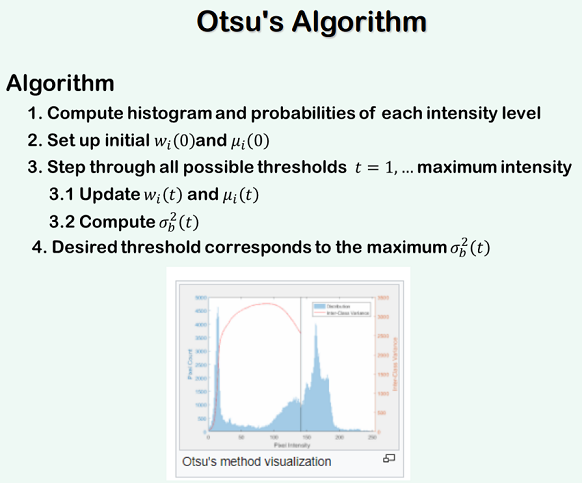


คำอธิบายละเอียดเพิ่มเติม:




#### <span style='color:lightblue;'>คำแนะนำทีละขั้นตอนสำหรับ Otsu Thresholding</span>  
1. **<span style='color:lightgreen;'>นำเข้าไลบรารีและกำหนดฟังก์ชัน</span>**
    - นำเข้าไลบรารีที่จำเป็นและกำหนดฟังก์ชันที่เขียนเอง

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def ShowImage(img):
    plt.axis("off")
    plt.imshow(img, cmap='gray')
    plt.show()

In [3]:
def histogram(img):
    row, col = img.shape
    hist = [0.0] * 256
    for i in range(row):
        for j in range(col):
            hist[img[i, j]]+=1
    return np.array(hist)

In [4]:
def ResizeImage(img, scale):
    row, col = img.shape
    dim = (int(col*scale), int(row*scale))
    return cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

2. **<span style='color:lightgreen;'>อ่านภาพ</span>**
    - โหลดและปรับขนาดภาพด้วย OpenCV

In [5]:
img = cv2.imread('./images/bank4.jpg', 0)
print(img.shape)

(514, 1200)


In [ ]:
img = ResizeImage(img, 0.5)
print(img.shape)

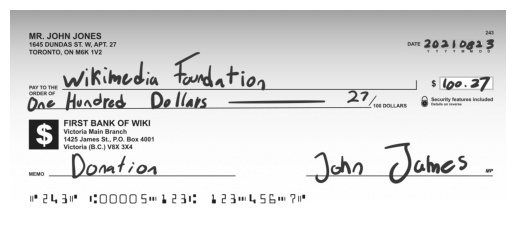

In [6]:
ShowImage(img)

3. **<span style='color:lightgreen;'>คำนวณฮิสโตแกรม</span>**
    - ฮิสโตแกรมแสดงการกระจายตัวของความเข้มแสงของพิกเซล (0-255) ในภาพ สำหรับแต่ละระดับความเข้มแสง ฮิสโตแกรมจะบอกจำนวนพิกเซลที่มีความเข้มแสงนั้นๆ

In [ ]:
hist = histogram(img)

4. **<span style='color:lightgreen;'>วาดกราฟฮิสโตแกรม</span>**
    - ใช้ Matplotlib เพื่อแสดงฮิสโตแกรม

In [ ]:
plt.figure(figsize=(4,2))
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()
# plt.savefig('histogram.png')

 - **<span style='color:lightgreen;'>คำนวณความน่าจะเป็นของฮิสโตแกรม:</span>** 
 ความน่าจะเป็นของแต่ละระดับความเข้มแสง คือ จำนวนพิกเซลที่มีความเข้มแสงนั้นหารด้วยจำนวนพิกเซลทั้งหมด

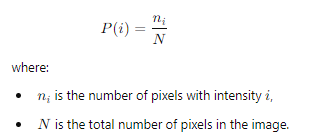



In [ ]:
prob = hist/np.sum(hist)

 - **<span style='color:lightgreen;'>แยกฮิสโตแกรมเป็น 2 กลุ่ม และคำนวณความน่าจะเป็นของแต่ละกลุ่ม:</span>**
 ความน่าจะเป็นของกลุ่มจะถูกคำนวณสำหรับสองกลุ่ม: กลุ่มหนึ่งแทนพิกเซลที่ต่ำกว่า threshold และอีกกลุ่มหนึ่งแทนพิกเซลที่สูงกว่า threshold สำหรับค่า threshold 𝑡 ที่กำหนด

 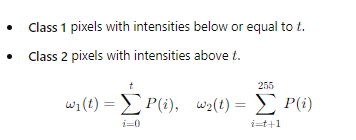


In [ ]:
thresh = 10

In [ ]:
w0 = np.sum(prob[:thresh]) + 0.00000001
w1 = np.sum(prob[thresh:]) + 0.00000001

 - **<span style='color:lightgreen;'>คำนวณค่าเฉลี่ยของแต่ละกลุ่มจากฮิสโตแกรม:</span>**
 สำหรับแต่ละกลุ่ม คุณคำนวณค่าเฉลี่ยของความเข้มแสงของพิกเซล

 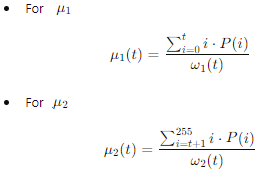

In [ ]:
u0 = np.sum(np.array([i for i in range(thresh)])*prob[:thresh])/w0
u1 = np.sum(np.array([i for i in range(thresh,256)])*prob[thresh:])/w1

 - **<span style='color:lightgreen;'>คำนวณความแปรปรวนระหว่างกลุ่ม (Inter-Class Variance):</span>**
 ความแปรปรวนระหว่างกลุ่มวัดการกระจายตัวภายในแต่ละกลุ่ม (พื้นหน้าและพื้นหลัง) คำนวณได้จาก:

 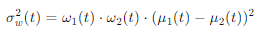

In [ ]:
v_btw = (w0*w1)*np.power(u0-u1,2)
print(v_btw)

 - **<span style='color:lightgreen;'>เลือกค่า Threshold ที่ทำให้ความแปรปรวนระหว่างกลุ่มมีค่าสูงสุด:</span>**
 เป้าหมายของอัลกอริทึม Otsu คือการทำให้ความแปรปรวนระหว่างกลุ่มมีค่าสูงสุด ดังนั้น คำนวณความแปรปรวนสำหรับทุกค่า threshold <i>𝑡</i> ที่เป็นไปได้ และค่า threshold ที่เหมาะสมที่สุดจะเป็นค่าที่ทำให้ <i>𝜎_btw</i> มีค่าสูงสุด

 - **<span style='color:lightgreen;'>นำค่า Threshold ไปใช้เพื่อแบ่งส่วนภาพ:</span>**
 เมื่อหาค่า threshold ที่เหมาะสมได้แล้ว นำไปใช้กับภาพโดยตั้งค่าพิกเซลทั้งหมดที่ต่ำกว่า threshold เป็น 0 (พื้นหลัง) และพิกเซลทั้งหมดที่สูงกว่า threshold เป็น 255 (พื้นหน้า)

In [ ]:
def otsu(hist):
    tot = np.sum(hist) # หาจำนวนพิกเซลทั้งหมด
    prob = hist/tot # คำนวณความน่าจะเป็นของแต่ละระดับความเข้มแสง
    coef_max = -1  
    thr = -1 
    for t in range(1,256):
        w0 = np.sum(prob[:t]) + 0.00000001
        w1 = np.sum(prob[t:]) + 0.00000001
        i0 = np.array([i for i in range(t)])
        i1 = np.array([i for i in range(t,256)])
        u0 = np.sum(i0*prob[:t])/w0
        u1 = np.sum(i1*prob[t:])/w1

        coef = (w0*w1)*np.power(u0-u1,2)
        if  coef > coef_max:
            coef_max = coef
            thr = t
    return thr

 - **<span style='color:lightgreen;'>กระบวนการหลัก</span>**

(514, 1200)


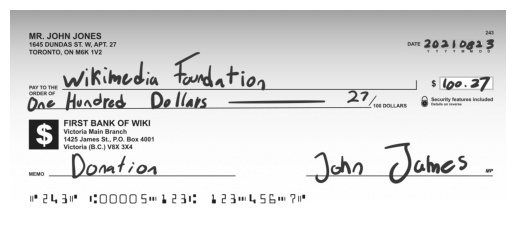

In [8]:
img = cv2.imread("./images/bank4.jpg", cv2.IMREAD_GRAYSCALE)
print(img.shape)
ShowImage(img)

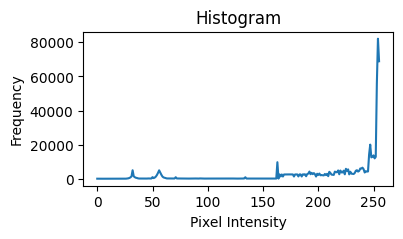

In [9]:
hist = histogram(img)
plt.figure(figsize=(4,2))
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [10]:
thr = otsu(hist)
print(thr)


147


 - **<span style='color:lightgreen;'>ขั้นตอนหา Threshold วิธีที่ 1</span>**

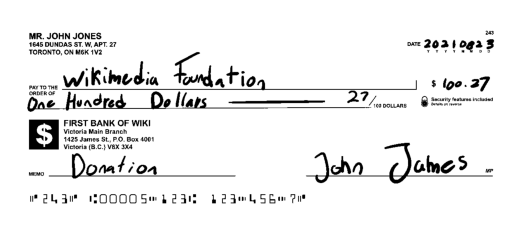

In [11]:
out = np.zeros_like(img)
thresh = thr
out[img >= thresh] = 255
out = out.astype(np.uint8)
ShowImage(out)

 - **<span style='color:lightgreen;'>ขั้นตอนหา Threshold วิธีที่ 2</span>**

In [ ]:
ret, out2 = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
ShowImage(out2)